In [3]:
from I3Tray import *
from icecube import icetray, dataclasses, phys_services, sim_services, dataio,  earthmodel_service, neutrino_generator, tableio, hdfwriter
from icecube.simprod import segments
from icecube.icetray import I3Units, I3Frame
from icecube.dataclasses import I3Particle
from icecube.simclasses import I3MMCTrack
from icecube.icetray import I3Units, OMKey, I3Frame
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math
import os.path
from os import path
from scipy import stats
from scipy.stats import norm
import scipy.special as sp

In [1]:
def frame_absent(run_num):
    if (run_num==6 or run_num==14 or run_num==36 or run_num==41 or run_num==49 or run_num==54 or run_num==59 or run_num==61 or run_num==76 or run_num==80 or run_num==82 or run_num==106 or run_num==131 or run_num==133 
        or run_num==149 or run_num==155 or run_num==172 or run_num==176 or run_num==189 or run_num==193 or run_num==198 or run_num==208 or run_num==214 or run_num==216
        or run_num==223 or run_num==235 or run_num==238 or run_num==252 or run_num==284 or run_num==288 or run_num==311 or run_num==369 or run_num==371 or run_num==377 or run_num==378 or run_num==385 or run_num==389 or run_num==390 
        or run_num==391 or run_num==392 or run_num==393 or run_num==397
        or run_num==395 or run_num==399 or run_num==401 or run_num==403 or run_num==419 or run_num==471 or run_num==522 or run_num==550 or run_num==538 or run_num==574 or 
        run_num==584 or run_num==643 or run_num==646 or run_num==647 or run_num==648 
        or run_num==650 or run_num==656 or run_num==657
        or run_num==658 or run_num==659 or run_num==665 or run_num==675 or run_num==683 or run_num==685 or run_num==686 or run_num==708 or run_num==711
        or run_num==714 or run_num==737 or run_num==837 or run_num==867 or run_num==878 or run_num==917 or run_num==944 or run_num==949 or run_num==954 or run_num==963 or run_num==971
        or run_num==972 or run_num==984 or run_num==987 or run_num==988 or run_num==989):
        return True
    else:
        return False

### Angular distribution of DOMs hit for all neutrinos...

In [4]:
dotpro=[]
for i in range(900,1100):
    print("file",i)
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if(frame_absent(i)==False):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
        
            gcd = dataio.I3File('/home/users/kaustav/pone_offline/GCD/PONE_Phase1.i3.gz') #GCD file for the position of DOMs
            frame_geodoms=gcd.pop_frame()
            geodoms=frame_geodoms['I3Geometry'].omgeo

            for frame in infile:   
                MMCTrackList = frame['MMCTrackList']
                secondary=MMCTrackList[0].GetI3Particle()   #Getting the starting position of charged lepton
                pulseseriesmap=frame['I3Photons_PMTResponse']
                for dom in pulseseriesmap.keys() :
                    domkey =  OMKey(dom.string, dom.om, 0) 
                    x1=-(secondary.pos.x-geodoms[domkey].position.x)
                    y1=-(secondary.pos.y-geodoms[domkey].position.y)
                    z1=-(secondary.pos.z-geodoms[domkey].position.z)
                    r1= math.sqrt(x1*x1+y1*y1+z1*z1)
                    factor=1
                    x2=np.sin(secondary.dir.theta*factor)*np.cos(secondary.dir.phi*factor)
                    y2=np.sin(secondary.dir.theta*factor)*np.sin(secondary.dir.phi*factor)
                    z2=np.cos(secondary.dir.theta*factor)
                    dotpro.append((x1*x2+y1*y2+z1*z2)/r1)

file 900
file 901
file 902
file 903
file 904
file 905
file 906
file 907
file 908
file 909
file 910
file 911
file 912
file 913
file 914
file 915
file 916
file 917
file 918
file 919
file 920
file 921
file 922
file 923
file 924
file 925
file 926
file 927
file 928
file 929
file 930
file 931
file 932
file 933
file 934
file 935
file 936
file 937
file 938
file 939
file 940
file 941
file 942
file 943
file 944
file 945
file 946
file 947
file 948
file 949
file 950
file 951
file 952
file 953
file 954
file 955
file 956
file 957
file 958
file 959
file 960
file 961
file 962
file 963
file 964
file 965
file 966
file 967
file 968
file 969
file 970
file 971
file 972
file 973
file 974
file 975
file 976
file 977
file 978
file 979
file 980
file 981
file 982
file 983
file 984
file 985
file 986
file 987
file 988
file 989
file 990
file 991
file 992
file 993
file 994
file 995
file 996
file 997
file 998
file 999
file 1000


RuntimeError: no frame to pop (in I3FramePtr dataio::I3File::pop_frame(I3Frame::Stream))

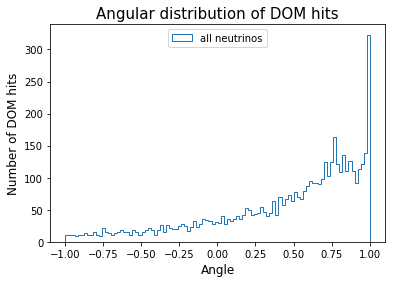

In [30]:
plt.hist(dotpro, bins=100,histtype='step',label='all neutrinos')
plt.xlabel('Angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.legend(loc='upper center')
plt.show()

### Distributions for different flavors...

In [3]:
dotpro_nue=[]
dotpro_numu=[]
dotpro_nutau=[]
events=0
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if(frame_absent(i)==False):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
        
            gcd = dataio.I3File('/home/users/kaustav/pone_offline/GCD/PONE_Phase1.i3.gz') #GCD file for the position of DOMs
            frame_geodoms=gcd.pop_frame()
            geodoms=frame_geodoms['I3Geometry'].omgeo
            for frame in infile:   
                events=events+1
                MMCTrackList = frame['MMCTrackList']
                secondary=MMCTrackList[0].GetI3Particle()   #Getting the starting position of charged lepton
                pulseseriesmap=frame['I3Photons_PMTResponse']
                for dom in pulseseriesmap.keys() :
                    domkey =  OMKey(dom.string, dom.om, 0) 
                    x1=-(secondary.pos.x-geodoms[domkey].position.x)
                    y1=-(secondary.pos.y-geodoms[domkey].position.y)
                    z1=-(secondary.pos.z-geodoms[domkey].position.z)
                    r1= math.sqrt(x1*x1+y1*y1+z1*z1)
                    factor=1
                    x2=np.sin(secondary.dir.theta*factor)*np.cos(secondary.dir.phi*factor)
                    y2=np.sin(secondary.dir.theta*factor)*np.sin(secondary.dir.phi*factor)
                    z2=np.cos(secondary.dir.theta*factor)
                    if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12):
                        dotpro_nue.append((x1*x2+y1*y2+z1*z2)/r1)
                    elif(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                        dotpro_numu.append((x1*x2+y1*y2+z1*z2)/r1)
                    elif(frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                        dotpro_nutau.append((x1*x2+y1*y2+z1*z2)/r1)                 

In [4]:
print(events)

3062


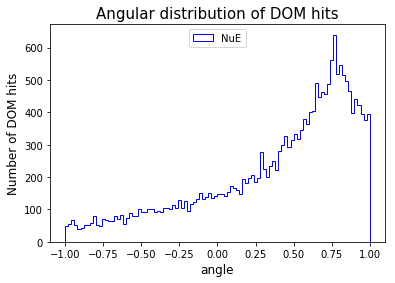

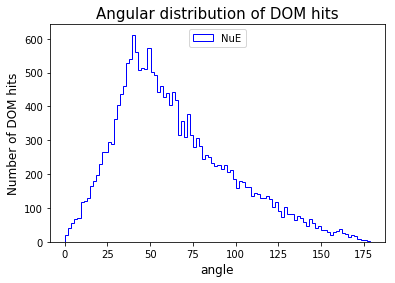

In [10]:
plt.hist(dotpro_nue, bins=100, histtype='step',color='blue',label='NuE')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(np.arccos(dotpro_nue)*(180/np.pi), bins=100, histtype='step',color='blue',label='NuE')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

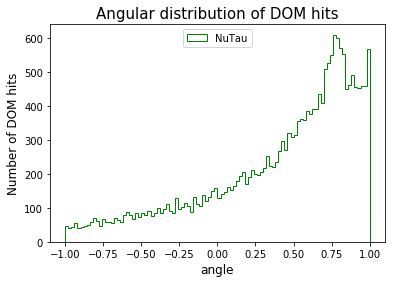

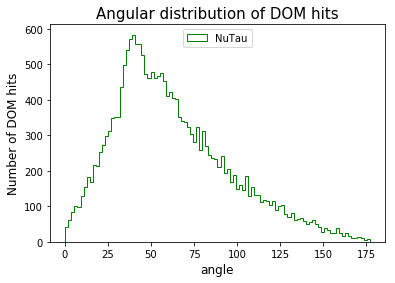

In [35]:
plt.hist(dotpro_nutau, bins=100, histtype='step',color='green',label='NuTau')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(np.arccos(dotpro_nutau)*(180/np.pi), bins=100, histtype='step',color='green',label='NuTau')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

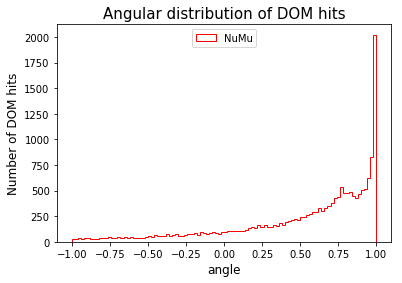

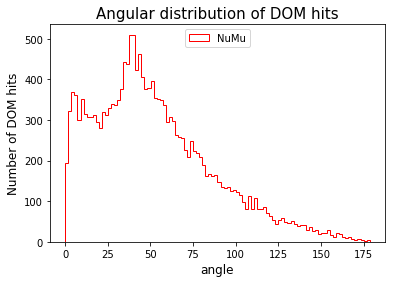

In [36]:
plt.hist(dotpro_numu, bins=100, histtype='step',color='red',label='NuMu')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(np.arccos(dotpro_numu)*(180/np.pi), bins=100, histtype='step',color='red',label='NuMu')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

### Finding the number of secondary particles for the NuMu events....

In [37]:
energy_numu=[]
for i in range(0,950):
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco14.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco54.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco61.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco106.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco133.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco155.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco172.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco189.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco208.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco235.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco238.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco369.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco371.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco377.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco389.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco390.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco391.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco392.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco395.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco399.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco401.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco403.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco419.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco643.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco648.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco650.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco656.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco658.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco659.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco665.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco675.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco683.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco685.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco686.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco708.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco711.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco714.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco737.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco837.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco917.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco944.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco949.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco954.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco963.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco971.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco972.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco984.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco987.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco989.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            
            for frame in infile:   
                if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    I3MCTree = frame['I3MCTree']
                    if (len(I3MCTree)>0):
                        for i in range(len(I3MCTree)-1):
                            energy_numu.append(frame['NuGPrimary'].energy)

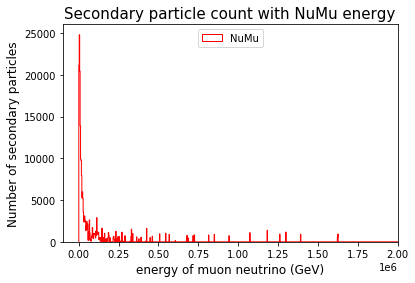

In [38]:
plt.hist(energy_numu, bins=2000, histtype='step',color='red',label='NuMu')
plt.legend(loc='upper center')
plt.xlabel('energy of muon neutrino (GeV)',fontsize=12)
plt.ylabel('Number of secondary particles',fontsize=12)
plt.title("Secondary particle count with NuMu energy",fontsize=15)
plt.ticklabel_format(style='plain')
plt.xlim(-100000,2000000)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

In [39]:
energy_numu=[]
n_secondary=[]
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco14.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco54.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco61.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco106.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco133.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco155.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco172.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco189.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco208.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco235.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco238.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco369.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco371.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco377.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco389.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco390.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco391.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco392.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco395.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco399.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco401.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco403.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco419.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco643.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco648.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco650.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco656.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco658.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco659.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco665.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco675.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco683.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco685.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco686.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco708.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco711.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco714.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco737.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco837.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco917.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco944.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco949.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco954.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco963.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco971.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco972.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco984.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco987.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco989.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
            
            for frame in infile:   
                if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    I3MCTree = frame['I3MCTree']
                    count=0
                    if (len(I3MCTree)>0 and frame['NuGPrimary'].energy<0.2*1000000):
                        for i in range(len(I3MCTree)):
                            if(I3MCTree[i].pdg_encoding==11 or I3MCTree[i].pdg_encoding==-11):
                                count=count+1    #counting only electrons as secondary particles
                        energy_numu.append(frame['NuGPrimary'].energy)
                        n_secondary.append(count)

In [ ]:
#I3MCTree[i].pdg_encoding==-2000001002
#I3MCTree[i].pdg_encoding==-2000001003

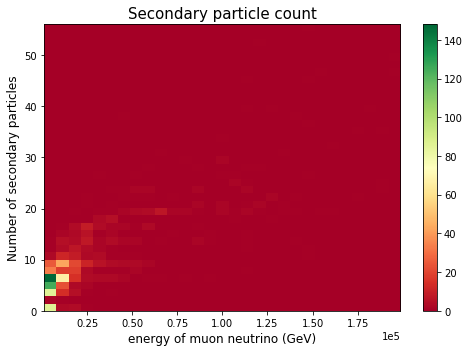

In [40]:
x_min = np.min(energy_numu)
x_max = np.max(energy_numu)
y_min = np.min(n_secondary)
y_max = np.max(n_secondary)
x_bins = np.linspace(x_min, x_max, 30)
y_bins = np.linspace(y_min, y_max, 40)

fig, ax = plt.subplots(figsize =(7, 5))
plt.hist2d(energy_numu, n_secondary, bins =[x_bins, y_bins], cmap='RdYlGn')
plt.title("Secondary particle count",fontsize=15)
ax.set_xlabel('energy of muon neutrino (GeV)',fontsize=12) 
ax.set_ylabel('Number of secondary particles',fontsize=12) 

plt.colorbar()
plt.tight_layout() 
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()

In [41]:
dotpro_numu_filtered=[]
for i in range(0,950):
    if path.exists("/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_reco/Nu_reco"+str(i)+".i3.zst"
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if ((infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco14.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco54.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco61.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco106.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco133.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco155.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco172.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco189.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco208.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco235.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco238.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco369.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco371.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco377.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco389.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco390.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco391.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco392.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco395.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco399.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco401.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco403.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco419.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco643.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco648.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco650.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco656.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco658.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco659.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco665.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco675.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco683.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco685.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco686.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco708.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco711.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco714.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco737.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco837.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco917.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco944.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco949.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco954.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco963.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco971.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco972.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco984.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco987.i3.zst")
             and (infile_name!="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco989.i3.zst")):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
        
            gcd = dataio.I3File('/home/users/kaustav/pone_offline/GCD/PONE_Phase1.i3.gz') #GCD file for the position of DOMs
            frame_geodoms=gcd.pop_frame()
            geodoms=frame_geodoms['I3Geometry'].omgeo

            for frame in infile:   
                if(frame['NuGPrimary'].pdg_encoding==14 or frame['NuGPrimary'].pdg_encoding==-14):
                    flag=True
                    I3MCTree = frame['I3MCTree']
                    count_secondary=0
                    for i in range(len(I3MCTree)):
                        if(I3MCTree[i].pdg_encoding==11 or I3MCTree[i].pdg_encoding==-11): 
                            count_secondary=count_secondary+1 
                    if(count_secondary<8):
                        MMCTrackList = frame['MMCTrackList']
                        secondary=MMCTrackList[0].GetI3Particle()   #Getting the starting position of charged lepton
                        pulseseriesmap=frame['I3Photons_PMTResponse']
                        for dom in pulseseriesmap.keys() :
                            domkey =  OMKey(dom.string, dom.om, 0) 
                            x1=-(secondary.pos.x-geodoms[domkey].position.x)
                            y1=-(secondary.pos.y-geodoms[domkey].position.y)
                            z1=-(secondary.pos.z-geodoms[domkey].position.z)
                            r1= math.sqrt(x1*x1+y1*y1+z1*z1)
                            factor=1
                            x2=np.sin(secondary.dir.theta*factor)*np.cos(secondary.dir.phi*factor)
                            y2=np.sin(secondary.dir.theta*factor)*np.sin(secondary.dir.phi*factor)
                            z2=np.cos(secondary.dir.theta*factor)
                            dotpro_numu_filtered.append((x1*x2+y1*y2+z1*z2)/r1)       

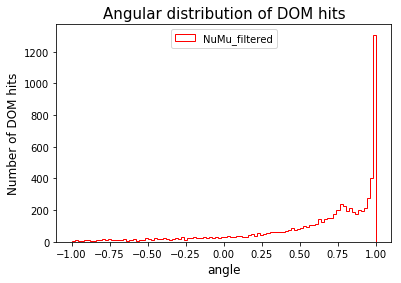

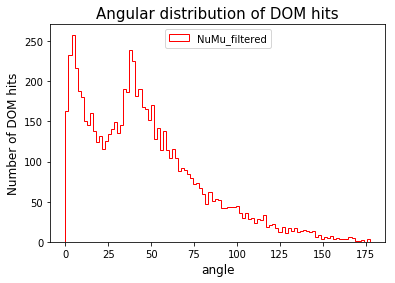

In [42]:
plt.hist(dotpro_numu_filtered, bins=100, histtype='step',color='red',label='NuMu_filtered')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(np.arccos(dotpro_numu_filtered)*(180/np.pi), bins=100, histtype='step',color='red',label='NuMu_filtered')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

### Comparing the filtered and non-filtered muon hits....

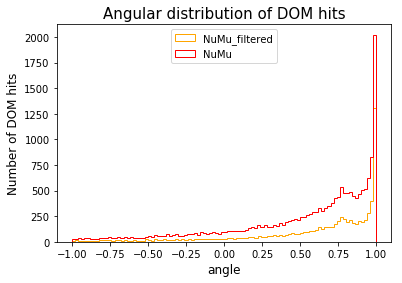

In [43]:
plt.hist(dotpro_numu_filtered, bins=100, histtype='step',color='orange',label='NuMu_filtered')
plt.hist(dotpro_numu, bins=100, histtype='step',color='red',label='NuMu')
plt.legend(loc='upper center')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

### Comparing the three flavors...

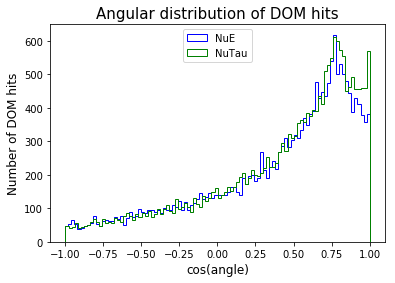

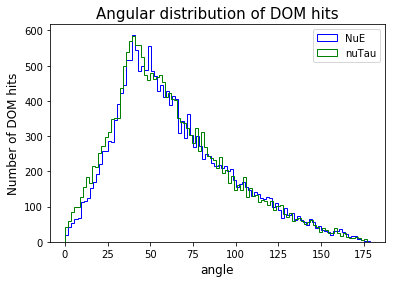

In [44]:
plt.hist(dotpro_nue, bins=100, histtype='step',color='blue',label='NuE')
#plt.hist(dotpro_numu, bins=100, histtype='step',color='red',label='numu')
plt.hist(dotpro_nutau, bins=100, histtype='step',color='green',label='NuTau')
plt.legend(loc='upper center')
plt.xlabel('cos(angle)',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(np.arccos(dotpro_nue)*(180/np.pi), bins=100, histtype='step',color='blue',label='NuE')
#plt.hist(np.arccos(dotpro_numu)*(180/np.pi), bins=100, histtype='step',color='red',label='NuMu')
plt.hist(np.arccos(dotpro_nutau)*(180/np.pi), bins=100, histtype='step',color='green',label='nuTau')
plt.legend(loc='upper right')
plt.xlabel('angle',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

### Trying to fit the data...

In [3]:
dotpro=[]
events=0
for i in range(0,1000):
    if path.exists("/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_anisotropy/Nu_reco"+str(i)+".i3.zst"
        if(frame_absent(i)==False):
            infile=dataio.I3File(infile_name)
            infile.pop_frame()
            infile.pop_frame()
        
            gcd = dataio.I3File('/home/users/kaustav/pone_offline/GCD/PONE_Phase1.i3.gz') #GCD file for the position of DOMs
            frame_geodoms=gcd.pop_frame()
            geodoms=frame_geodoms['I3Geometry'].omgeo
            for frame in infile:   
                events=events+1
                MMCTrackList = frame['MMCTrackList']
                secondary=MMCTrackList[0].GetI3Particle()   #Getting the starting position of charged lepton
                pulseseriesmap=frame['I3Photons_PMTResponse']
                for dom in pulseseriesmap.keys() :
                    domkey =  OMKey(dom.string, dom.om, 0) 
                    x1=-(secondary.pos.x-geodoms[domkey].position.x)
                    y1=-(secondary.pos.y-geodoms[domkey].position.y)
                    z1=-(secondary.pos.z-geodoms[domkey].position.z)
                    r1= math.sqrt(x1*x1+y1*y1+z1*z1)
                    x2=np.sin(secondary.dir.theta)*np.cos(secondary.dir.phi)
                    y2=np.sin(secondary.dir.theta)*np.sin(secondary.dir.phi)
                    z2=np.cos(secondary.dir.theta)
                    if(frame['NuGPrimary'].pdg_encoding==12 or frame['NuGPrimary'].pdg_encoding==-12 or frame['NuGPrimary'].pdg_encoding==16 or frame['NuGPrimary'].pdg_encoding==-16):
                        dotpro.append((x1*x2+y1*y2+z1*z2)/r1)          

In [4]:
data=(np.arccos(dotpro)*(180/np.pi))
print(np.histogram(data,bins=90))

(array([   3,    8,   16,   20,   24,   23,   23,   47,   51,   47,   51,
         40,   54,   63,   64,   75,   92,  109,   93,   94,  124,  118,
        123,  146,  154,  155,  173,  183,  187,  200,  205,  247,  218,
        253,  260,  261,  294,  294,  315,  273,  344,  380,  388,  396,
        423,  420,  450,  463,  471,  546,  514,  563,  570,  653,  602,
        648,  644,  795,  788,  792,  803,  864,  896,  939,  969, 1009,
        967, 1017, 1049, 1166, 1129, 1012,  946,  853,  713,  693,  608,
        575,  561,  484,  409,  380,  293,  302,  266,  185,  183,  151,
        108,   65]), array([  1.58150137,   3.56079334,   5.54008531,   7.51937728,
         9.49866925,  11.47796122,  13.45725319,  15.43654516,
        17.41583713,  19.3951291 ,  21.37442107,  23.35371304,
        25.33300501,  27.31229698,  29.29158895,  31.27088092,
        33.25017289,  35.22946486,  37.20875683,  39.1880488 ,
        41.16734077,  43.14663274,  45.12592471,  47.10521668,
        49.08450

In [4]:
Y=np.array([ 65,  108,  151,  183,  185,  266,  302,  293,  380,  409,  484,
        561,  575,  608,  693,  713,  853,  946, 1012, 1129, 1166, 1049,
       1017,  967, 1009,  969,  939,  896,  864,  803,  792,  788,  795,
        644,  648,  602,  653,  570,  563,  514,  546,  471,  463,  450,
        420,  423,  396,  388,  380,  344,  273,  315,  294,  294,  261,
        260,  253,  218,  247,  205,  200,  187,  183,  173,  155,  154,
        146,  123,  118,  124,   94,   93,  109,   92,   75,   64,   63,
         54,   40,   51,   47,   51,   47,   23,   23,   24,   20,   16,
          8,    3])

X= np.array([ 0.28222136,   2.26151333,   4.2408053 ,   6.22009727,
         8.19938924,  10.17868121,  12.15797318,  14.13726515,
        16.11655712,  18.09584909,  20.07514106,  22.05443303,
        24.033725  ,  26.01301697,  27.99230894,  29.97160091,
        31.95089287,  33.93018484,  35.90947681,  37.88876878,
        39.86806075,  41.84735272,  43.82664469,  45.80593666,
        47.78522863,  49.7645206 ,  51.74381257,  53.72310454,
        55.70239651,  57.68168848,  59.66098045,  61.64027242,
        63.61956439,  65.59885636,  67.57814833,  69.5574403 ,
        71.53673227,  73.51602424,  75.49531621,  77.47460818,
        79.45390015,  81.43319212,  83.41248408,  85.39177605,
        87.37106802,  89.35035999,  91.32965196,  93.30894393,
        95.2882359 ,  97.26752787,  99.24681984, 101.22611181,
       103.20540378, 105.18469575, 107.16398772, 109.14327969,
       111.12257166, 113.10186363, 115.0811556 , 117.06044757,
       119.03973954, 121.01903151, 122.99832348, 124.97761545,
       126.95690742, 128.93619939, 130.91549136, 132.89478332,
       134.87407529, 136.85336726, 138.83265923, 140.8119512 ,
       142.79124317, 144.77053514, 146.74982711, 148.72911908,
       150.70841105, 152.68770302, 154.66699499, 156.64628696,
       158.62557893, 160.6048709 , 162.58416287, 164.56345484,
       166.54274681, 168.52203878, 170.50133075, 172.48062272,
       174.45991469, 176.43920666, 178.41849863])

In [5]:
for i in range(len(X)-1):
    X[i] = (X[i]+X[i+1])/2
X = X[:-1]

1244.853544305786


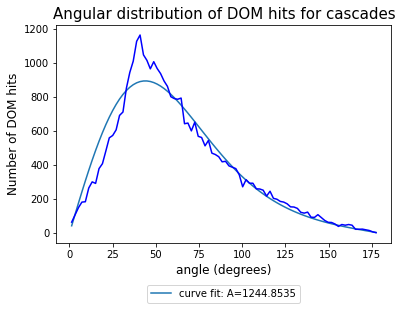

In [35]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.special as sp

k=1.50000000
def func2(x,amp):
    
    return amp*((np.exp(k*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(k/(2*np.sinh(k))))

popt, pcov = curve_fit(func2, X, Y, bounds=([5], [4000]))
print(popt[0])
plt.plot(X, func2(X, *popt), label='curve fit: A=%5.4f' % tuple(popt))

plt.plot(X,Y,color='blue')
plt.xlabel('angle (degrees)',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits for cascades",fontsize=15)
plt.ticklabel_format(style='plain')
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.3))
plt.show()

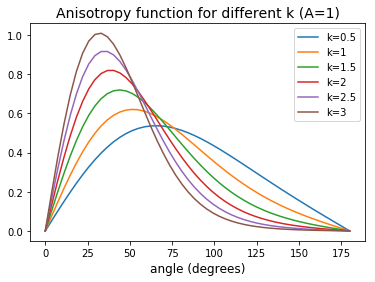

In [15]:
x=np.linspace(0,180)
plt.plot(x,np.exp(0.5*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180))*(0.5/(2*np.sinh(0.5))),label='k=0.5')
plt.plot(x,np.exp(1*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180))*(1/(2*np.sinh(1))),label='k=1')
plt.plot(x,np.exp(1.5*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180))*(1.5/(2*np.sinh(1.5))),label='k=1.5')
plt.plot(x,np.exp(2*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180))*(2/(2*np.sinh(2))),label='k=2')
plt.plot(x,np.exp(2.5*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180))*(2.5/(2*np.sinh(2.5))),label='k=2.5')
plt.plot(x,np.exp(3*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180))*(3/(2*np.sinh(3))),label='k=3')

plt.legend(loc="upper right")
plt.title("Anisotropy function for different k (A=1)",fontsize=14)
plt.xlabel('angle (degrees)',fontsize=12)
plt.show()

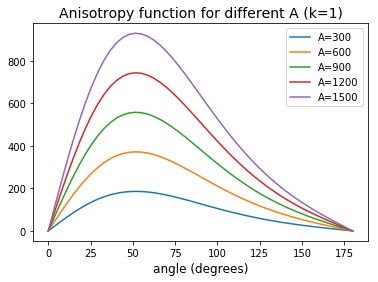

In [17]:
x=np.linspace(0,180)
plt.plot(x,300*((np.exp(1*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(1/(2*np.sinh(1)))),label='A=300')
plt.plot(x,600*((np.exp(1*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(1/(2*np.sinh(1)))),label='A=600')
plt.plot(x,900*((np.exp(1*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(1/(2*np.sinh(1)))),label='A=900')
plt.plot(x,1200*((np.exp(1*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(1/(2*np.sinh(1)))),label='A=1200')
plt.plot(x,1500*((np.exp(1*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(1/(2*np.sinh(1)))),label='A=1500')
plt.legend(loc="upper right")
plt.title("Anisotropy function for different A (k=1)",fontsize=14)
plt.xlabel('angle (degrees)',fontsize=12)
plt.show()

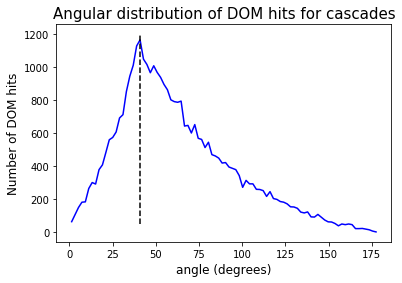

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.special as sp

def func2(x,amp,k):
    return amp*(np.exp(k*np.cos(x*np.pi/180))*np.sin(x*np.pi/180))

popt, pcov = curve_fit(func2, X, Y, bounds=([5,0], [4000,70]))
popt
#plt.plot(X, func2(X, *popt), label='fit: amplitude=%5.1f , k=%5.1f' % tuple(popt))
y=[50,1200]
x=[40.8,40.8]
plt.plot(X,Y,color='blue')
plt.plot(x,y,'--',color='black')
plt.xlabel('angle (degrees)',fontsize=12)
plt.ylabel('Number of DOM hits',fontsize=12)
plt.title("Angular distribution of DOM hits for cascades",fontsize=15)
plt.ticklabel_format(style='plain')
#plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.4))
plt.show()

0.1


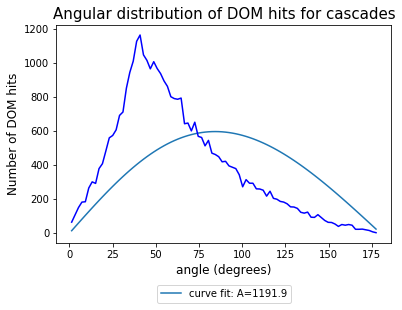

0.2


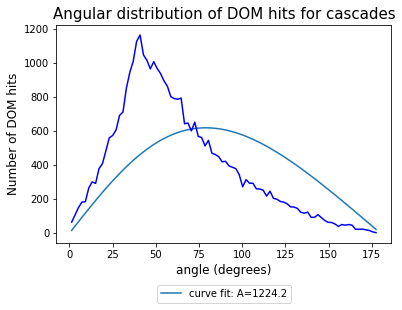

0.3


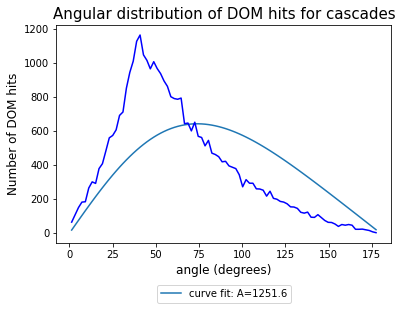

0.4


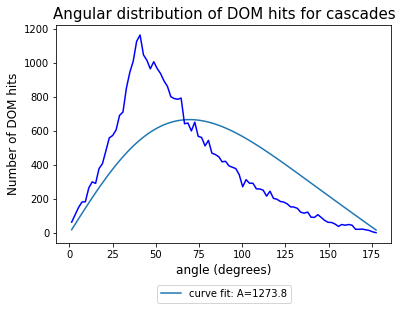

0.5


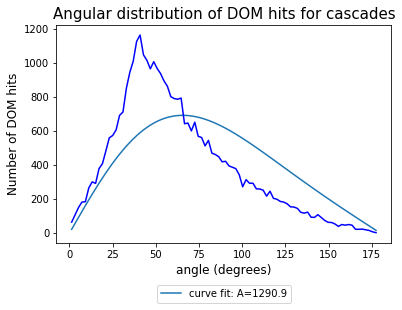

0.6


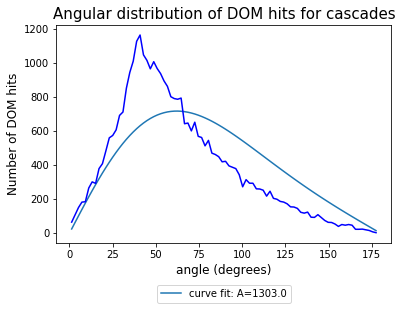

0.7


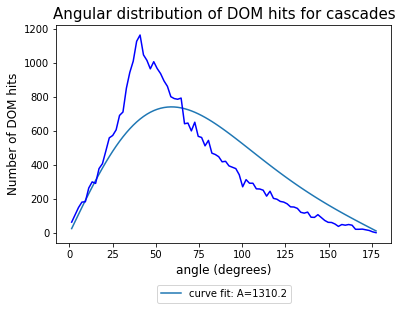

0.8


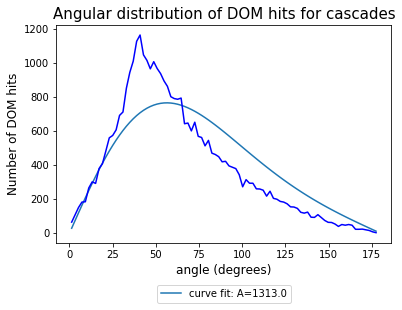

0.9


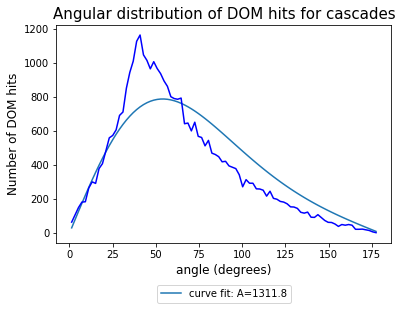

1.0


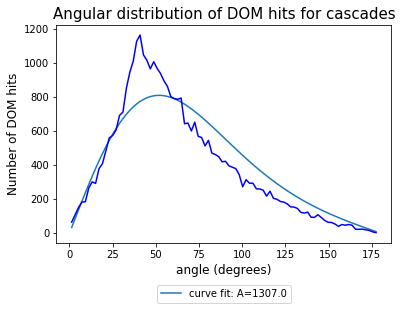

1.1


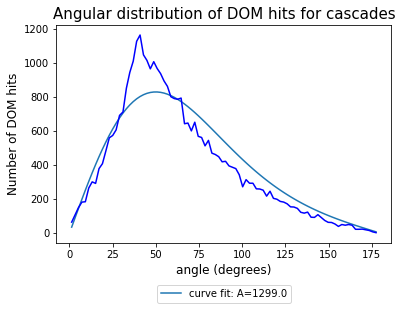

1.2


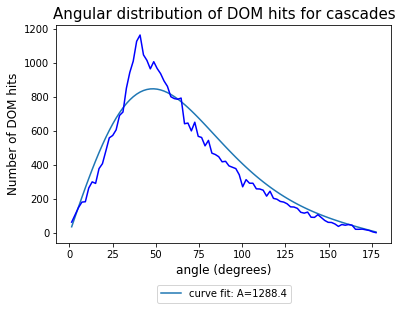

1.3


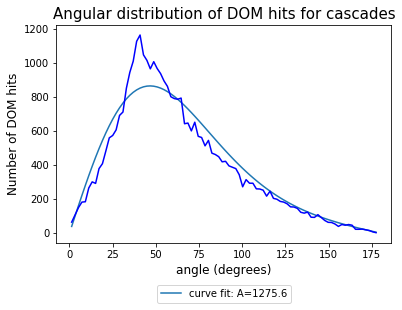

1.4


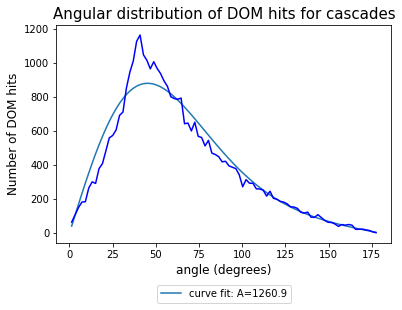

1.5


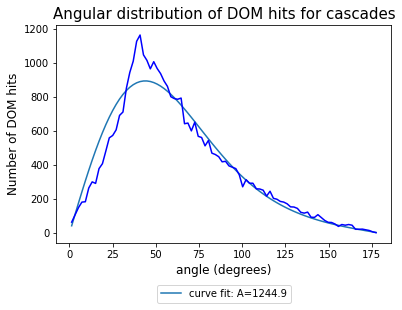

1.6


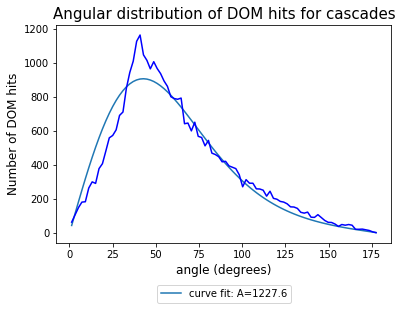

1.7


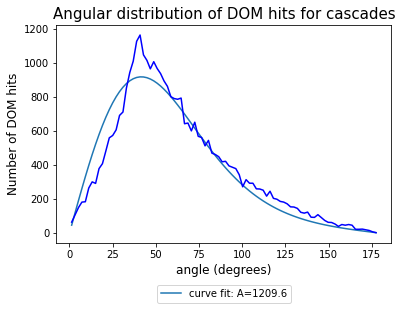

1.8


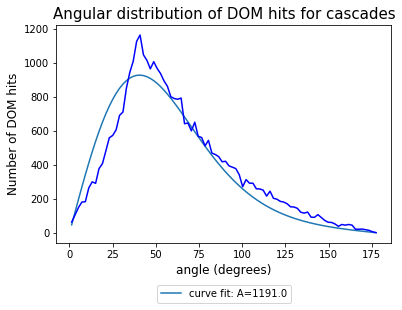

1.9


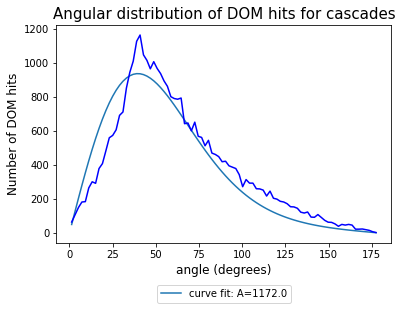

2.0


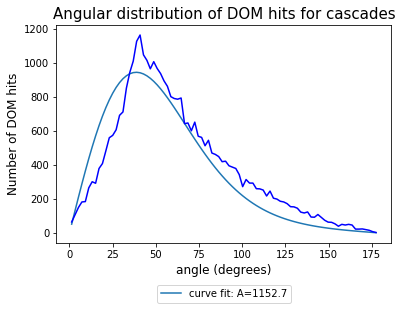

2.1


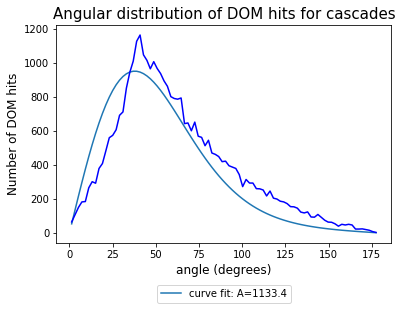

2.2


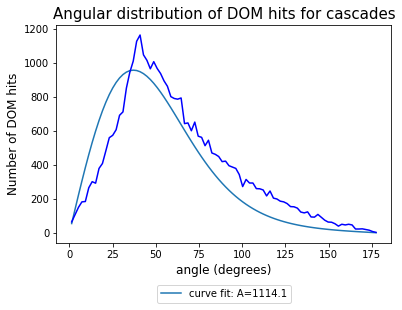

2.3


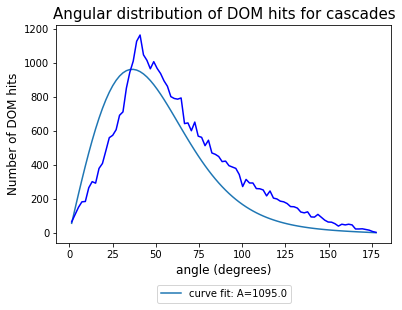

2.4


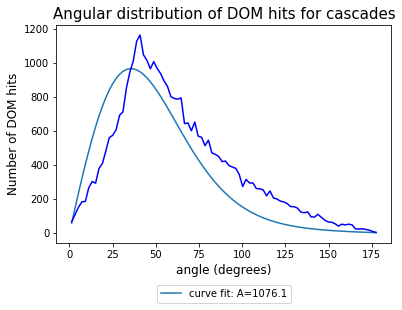

2.5


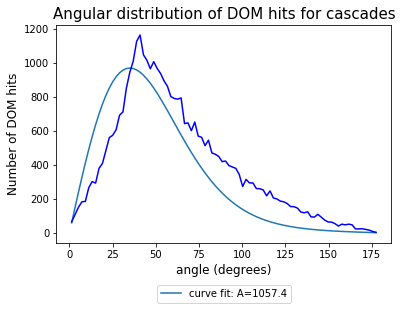

2.6


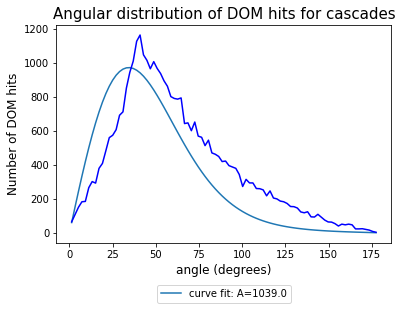

2.7


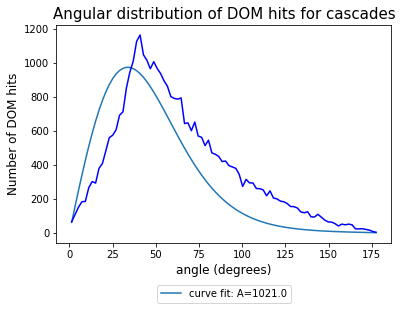

2.8


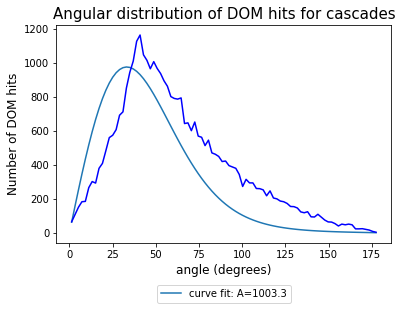

2.9


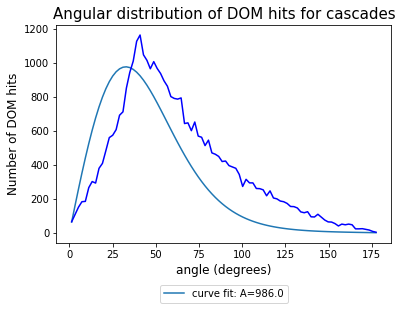

In [28]:
for k in range(1,30):
    def func2(x,amp):
        return amp*((np.exp(k*np.cos(x*np.pi/180))*(np.sin(x*np.pi/180)))*(k/(2*np.sinh(k))))
      
    k=k/10
    print(k)
    popt, pcov = curve_fit(func2, X, Y, bounds=([5], [4000]))
    popt
    plt.plot(X, func2(X, *popt), label='curve fit: A=%5.1f' % tuple(popt))

    plt.plot(X,Y,color='blue')
    plt.xlabel('angle (degrees)',fontsize=12)
    plt.ylabel('Number of DOM hits',fontsize=12)
    plt.title("Angular distribution of DOM hits for cascades",fontsize=15)
    plt.ticklabel_format(style='plain')
    plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.3))
    plt.show()